<a href="https://colab.research.google.com/github/crsimmons1/lifeexpectancy/blob/master/DataProcessesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Launch Project 

data from https://www.kaggle.com/kumarajarshi/life-expectancy-who/kernels

### Data Dictionary 
The Variables are:
* Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Total Expenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Gross Domestic Product per capita (in USD)
* Population of the country
* Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Number of years of Schooling(years)

### Import Data

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv("LifeExpectancyData.csv")

In [266]:
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [267]:
data.shape

(2938, 22)

## Data Cleaning
### The Basics: Missing/Duplicated Values, Cardinality, Summary Statistics

In [268]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [0]:
#Rename Columns
data = data.rename(columns={'Life expectancy ': "LifeExpectancy", "Adult Mortality": "AdultMortality", "infant deaths": "InfantDeaths", "percentage expenditure": "Expenditure",
                          "Hepatitis B": "HepB", "Measles ": "Measles" , " BMI ": "BMI", "under-five deaths ": "5deaths",
                         "Total expenditure": "TExpenditure", "Diphtheria ": "Diphtheria", " HIV/AIDS":"HIV", " thinness  1-19 years":"ThinJuvenile",
                         " thinness 5-9 years":"ThinChild", "Income composition of resources":"IncomeComp"})

In [270]:
#Check for duplicates
data[data.duplicated()].shape

(0, 22)

In [271]:
#Check Cardinality 
def cardinality_categorical(df):
    n_records = len(df)
    for column in df.select_dtypes([object]):
        print("{} | uniques/records: {:.3f} | Minimum observations: {:.3f}".format(
            column, 
            len(df[column].unique())/n_records,
            df[column].value_counts().min()
        ))        

cardinality_categorical(data)

Country | uniques/records: 0.066 | Minimum observations: 1.000
Status | uniques/records: 0.001 | Minimum observations: 512.000


In [272]:
n_records = len(data)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(data)

Country | 0.0 | object
Year | 0.0 | int64
Status | 0.0 | object
LifeExpectancy | 0.0034036759700476512 | float64
AdultMortality | 0.0034036759700476512 | float64
InfantDeaths | 0.0 | int64
Alcohol | 0.06603131381892444 | float64
Expenditure | 0.0 | float64
HepB | 0.18822328114363512 | float64
Measles | 0.0 | int64
BMI | 0.011572498298162015 | float64
5deaths | 0.0 | int64
Polio | 0.006466984343090538 | float64
TExpenditure | 0.07692307692307693 | float64
Diphtheria | 0.006466984343090538 | float64
HIV | 0.0 | float64
GDP | 0.1524846834581348 | float64
Population | 0.22191967324710687 | float64
ThinJuvenile | 0.011572498298162015 | float64
ThinChild | 0.011572498298162015 | float64
IncomeComp | 0.056841388699795777 | float64
Schooling | 0.05547991831177672 | float64


Here the most problematic columns are those with more than 5% missing values. This includes 
* Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Total Expenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Gross Domestic Product per capita (in USD)
* Population of the country
* Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Number of years of Schooling(years)

In [0]:
# Create a column that counts the number of NaN values in each row 
data['NAcount'] = 23 - data.apply(lambda x: x.count(), axis=1)

In [274]:
data.describe()

,Year,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,Expenditure,HepB,Measles,BMI,5deaths,Polio,TExpenditure,Diphtheria,HIV,GDP,Population,ThinJuvenile,ThinChild,IncomeComp,Schooling,NAcount
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,1.872362
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,1.369339
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,1.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,1.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,1.000000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,2.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,10.000000


In [0]:
# Subset to the rows with max of 3 missing values
data= data[data['NAcount'] <= 3]

In [276]:
# Drop unneeded column 
data = data.drop(columns='NAcount')
data.shape

(2666, 22)

In [277]:
missing_values_df(data)

Country | 0.0 | object
Year | 0.0 | int64
Status | 0.0 | object
LifeExpectancy | 0.0 | float64
AdultMortality | 0.0 | float64
InfantDeaths | 0.0 | int64
Alcohol | 0.043567052416609936 | float64
Expenditure | 0.0 | float64
HepB | 0.1531654186521443 | float64
Measles | 0.0 | int64
BMI | 0.0 | float64
5deaths | 0.0 | int64
Polio | 0.0 | float64
TExpenditure | 0.045609257998638526 | float64
Diphtheria | 0.0 | float64
HIV | 0.0 | float64
GDP | 0.07964601769911504 | float64
Population | 0.14669843430905377 | float64
ThinJuvenile | 0.0 | float64
ThinChild | 0.0 | float64
IncomeComp | 0.0 | float64
Schooling | 0.0 | float64


In [278]:
df2 = data.HepB.isnull().groupby([data['Country']]).sum().astype(int).reset_index(name='HepB_NA')
df3= data.GDP.isnull().groupby([data['Country']]).sum().astype(int).reset_index(name='GDPNAcount')
df2['NA_GDP'] = df3['GDPNAcount']
df2

,Country,HepB_NA,NA_GDP
0,Afghanistan,0,0
1,Albania,0,0
2,Algeria,4,0
3,Angola,7,0
4,Antigua and Barbuda,1,0
...,...,...,...
166,Venezuela (Bolivarian Republic of),0,15
167,Viet Nam,0,12
168,Yemen,0,15
169,Zambia,5,0


### Correlation Plot

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
cont_vars = list(data.columns)[3:]

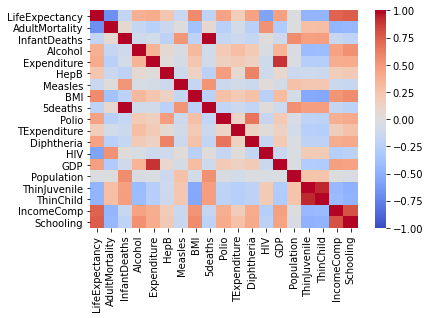

In [281]:
sns.heatmap(data[cont_vars].corr(), annot=False, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [282]:
groupby = data.groupby('Country').count()[['LifeExpectancy','GDP', 'Alcohol', 'IncomeComp', 'Schooling']]
groupby

,LifeExpectancy,GDP,Alcohol,IncomeComp,Schooling
Country,,,,,
Afghanistan,16,16,16,16,16
Albania,16,16,16,16,16
Algeria,16,16,15,16,16
Angola,16,16,15,16,16
Antigua and Barbuda,15,15,15,15,15
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),15,0,15,15,15
Viet Nam,12,0,12,12,12
Yemen,15,0,15,15,15


In [0]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [0]:
# Initialize the Imputer
iimputer = IterativeImputer(max_iter=15, random_state=0)

In [0]:
data= data.drop(columns='Country')

In [0]:
#y = data.LifeExpectancy
#y2 = data.Status
y = data[['Status', 'LifeExpectancy']]
X = data.drop(columns=['Status', 'LifeExpectancy'])

In [0]:
#Train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)

In [288]:
# Fit the Imputer
iimputer.fit(X_train)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=15, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [289]:
# Actually change the data
X_train = iimputer.transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.shape

(2132, 19)

In [290]:
# Fit and transform test data 
X_test = iimputer.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.shape

(534, 19)

In [291]:
X_train.head(2)

,Year,AdultMortality,InfantDeaths,Alcohol,Expenditure,HepB,Measles,BMI,5deaths,Polio,TExpenditure,Diphtheria,HIV,GDP,Population,ThinJuvenile,ThinChild,IncomeComp,Schooling
0,2009.0,279.0,1.0,0.490000,177.267161,89.0,48.0,31.7,2.0,89.0,8.370000,89.0,3.2,1253.657431,83684.0,5.7,5.6,0.436,5.3
1,2015.0,53.0,0.0,5.872254,0.000000,67.0,22.0,59.5,0.0,98.0,6.611577,98.0,0.1,5585.258470,9799186.0,1.5,1.4,0.909,15.9


In [292]:
X_train.describe()

,Year,AdultMortality,InfantDeaths,Alcohol,Expenditure,HepB,Measles,BMI,5deaths,Polio,TExpenditure,Diphtheria,HIV,GDP,Population,ThinJuvenile,ThinChild,IncomeComp,Schooling
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2.132000e+03,2132.000000,2132.000000,2132.000000,2132.000000
mean,2007.414165,163.347092,30.196529,4.461315,784.210115,78.694067,2311.764540,38.354690,41.568011,83.156191,5.879050,82.952627,1.804503,6879.022615,1.219773e+07,4.926220,4.971670,0.632057,12.075516
std,4.574391,121.818139,119.444983,3.920968,1978.667542,24.873200,10679.891206,19.811296,162.734547,22.311339,2.319083,22.887461,5.387250,13343.714081,6.192380e+07,4.530537,4.634997,0.203864,3.197219
min,2000.000000,1.000000,0.000000,-4.825865,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,-1691.433233,-1.608070e+07,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,74.750000,0.000000,0.880000,10.895488,73.000000,0.000000,19.500000,0.000000,78.000000,4.337500,79.000000,0.100000,488.562280,2.545235e+05,1.600000,1.600000,0.501000,10.200000
50%,2007.000000,144.000000,3.000000,3.695000,86.985445,88.000000,15.500000,43.600000,4.000000,93.000000,5.790000,93.000000,0.100000,1772.961675,1.944258e+06,3.300000,3.300000,0.678000,12.300000
75%,2011.000000,224.000000,20.000000,7.300000,493.349782,96.000000,362.250000,56.100000,24.000000,97.000000,7.322500,97.000000,0.700000,5239.296855,7.496690e+06,7.300000,7.300000,0.777000,14.200000
max,2015.000000,717.000000,1800.000000,17.310000,18961.348600,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,99.000000,50.600000,115761.577000,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [295]:
X_train.shape

(2132, 19)

In [296]:
X_test.shape

(534, 19)

In [297]:
y_train.shape

(2132, 2)

In [298]:
y_test.shape

(534, 2)

In [305]:
train = pd.concat([X_train,y_train.reindex(X_train.index)], axis=1)
train.shape

(2132, 21)

In [306]:
test = pd.concat([X_test,y_test.reindex(X_test.index)], axis=1)
test.shape

(534, 21)

In [0]:
test.to_csv(r'test.csv', index = None, header=True)

In [0]:
train.to_csv(r'train.csv', index = None, header=True)